In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 1

В качестве исходных данных имеется датафрейм, который содержит информацию о количестве сделок по продаже недвижимости и их суммарной выручке в течение года. Необходимо построить график, на котором одновременно будут отображаться выручка в млн руб. (линейный график) и количество сделок (столбчатая диаграмма). Вводные по визуализации:
- линейный график: линия сплошная, красный цвет, маркер 'o', толщина линии 1.5
- столбчатая диаграмма: синий цвет, прозрачность 0.2
- для дублирования осей использовать метод twinx()
- подписать ось1 'выручка, млн руб.', ось2 'количество сделок', ось Х 'месяц'
- название графика 'Годовая динамика продаж в секторе недвижимости'

In [2]:
df = pd.DataFrame({'month':[1,2,3,4,5,6,7,8,9,10,11,12],
                   'orders':[2,5,8,12,15,8,17,8,5,10,7,9],
                  'revenue': [100, 250, 170, 300, 480, 360, 560, 340, 350, 280, 160, 140]})

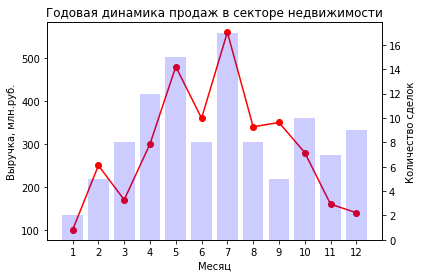

In [3]:
fig, ax1 = plt.subplots()

ax1.plot(df['month'], df['revenue'], color='red', linestyle='-', marker='o', linewidth=1.5)
plt.xticks(df['month'])

ax1.set_xlabel('Месяц')
ax1.set_ylabel('Выручка, млн.руб.')
ax1.set_title('Годовая динамика продаж в секторе недвижимости')

ax2= ax1.twinx()

ax2.bar(df['month'], df['orders'], color='blue', alpha=0.2)
ax2.set_ylabel('Количество сделок')


plt.show()

# Task 2

Построй график, на котором 2 линии будут отображать количество выпущенных фильмов и сериалов по годам, начиная с 2000 года. Предварительно преобразуй столбец с годом выпуска в строку. Подпиши оси и название графика. отобрази легенду.

In [4]:
data = pd.read_csv('../datasets/netflix_titles.csv')

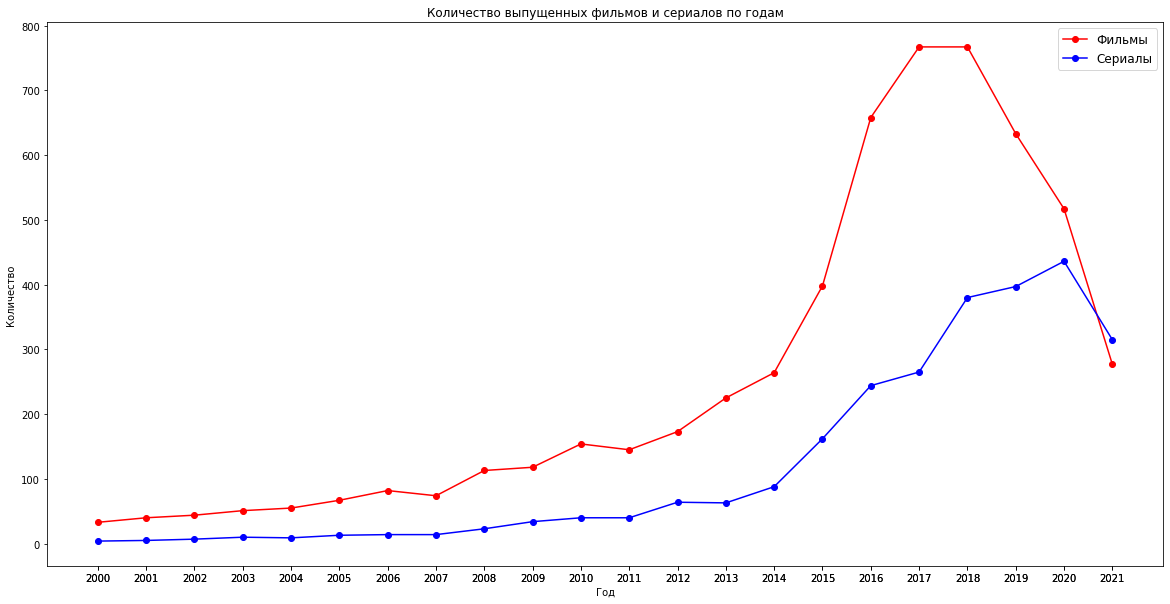

In [5]:
data_2000 = data[data['release_year'] >= 2000]
d_2 = data_2000.groupby(['type', 'release_year']).size().rename('counts').reset_index()
d_2['release_year'] = d_2['release_year'].astype('str')
fig, ax1 = plt.subplots(figsize=(20,10))
# Фильмы
ax1.plot(d_2.loc[d_2['type'] == 'Movie', 'release_year'], d_2.loc[d_2['type'] == 'Movie', 'counts'], color='red', linestyle='-', marker='o', linewidth=1.5, label ='Фильмы')
plt.xticks(d_2['release_year'])
# Сериалы
ax1.plot(d_2.loc[d_2['type'] == 'TV Show', 'release_year'], d_2.loc[d_2['type'] == 'TV Show', 'counts'], color='blue', linestyle='-', marker='o', linewidth=1.5, label = 'Сериалы')

ax1.set_xlabel('Год')
ax1.set_ylabel('Количество ')
ax1.set_title('Количество выпущенных фильмов и сериалов по годам')

plt.legend(fontsize=12)
plt.show()

# Task 3

Используя метод fill_between(), закрась пространство под графиками из задания 2 до оси X в цвет линии графика и прозрачностью 0.1. В результате должно получиться 2 области, которые перекрывают друг друга.

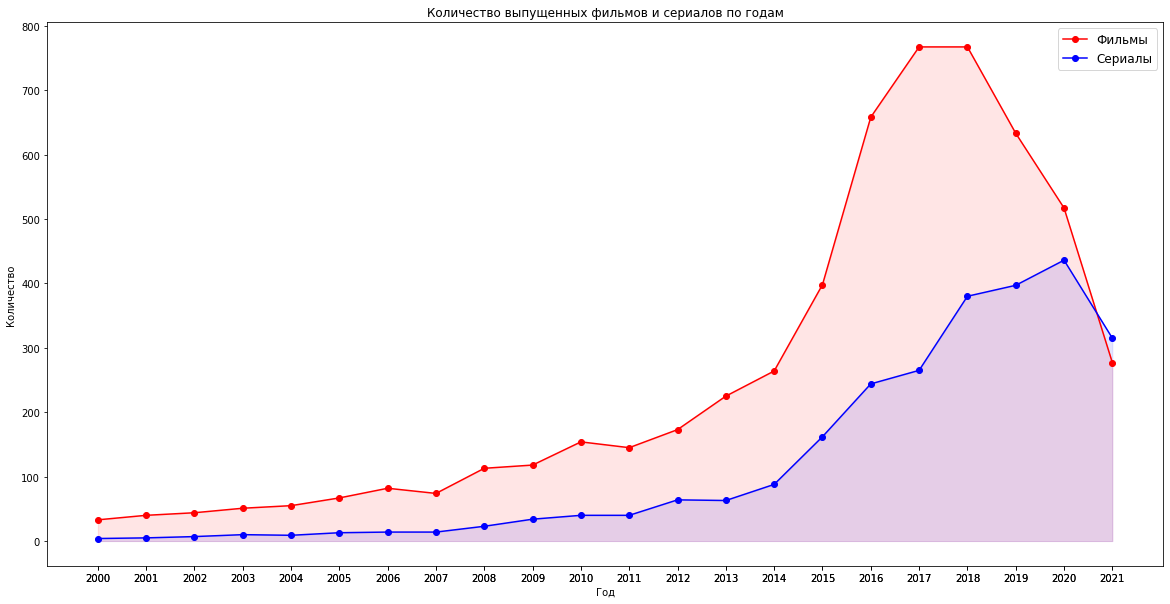

In [6]:
data_2000 = data[data['release_year'] >= 2000]
d_2 = data_2000.groupby(['type', 'release_year']).size().rename('counts').reset_index()
d_2['release_year'] = d_2['release_year'].astype('str')
fig, ax1 = plt.subplots(figsize=(20,10))
# Фильмы
ax1.plot(d_2.loc[d_2['type'] == 'Movie', 'release_year'], d_2.loc[d_2['type'] == 'Movie', 'counts'], color='red', linestyle='-', marker='o', linewidth=1.5, label ='Фильмы')
ax1.fill_between(d_2.loc[d_2['type'] == 'Movie', 'release_year'], d_2.loc[d_2['type'] == 'Movie', 'counts'], color='red', alpha=0.1)
plt.xticks(d_2['release_year'])
# Сериалы
ax1.plot(d_2.loc[d_2['type'] == 'TV Show', 'release_year'], d_2.loc[d_2['type'] == 'TV Show', 'counts'], color='blue', linestyle='-', marker='o', linewidth=1.5, label = 'Сериалы')
ax1.fill_between(d_2.loc[d_2['type'] == 'TV Show', 'release_year'], d_2.loc[d_2['type'] == 'TV Show', 'counts'], color='blue', alpha=0.1)

ax1.set_xlabel('Год')
ax1.set_ylabel('Количество ')
ax1.set_title('Количество выпущенных фильмов и сериалов по годам')

plt.legend(fontsize=12)
plt.show()


# Task 4

Измени график: 

- отсортируй стоблцы по возврастанию;
- раскрась столбцы по возрастанию при помощи matplotlib.colormaps 'hsv', используй для кодирования цветов значения df["counts"];
- смести подписи значений столбцов в центр столбца и замени цвет шрифта на белый (не забудь изменить verticalalignment, чтобы подписи были точно по центру).

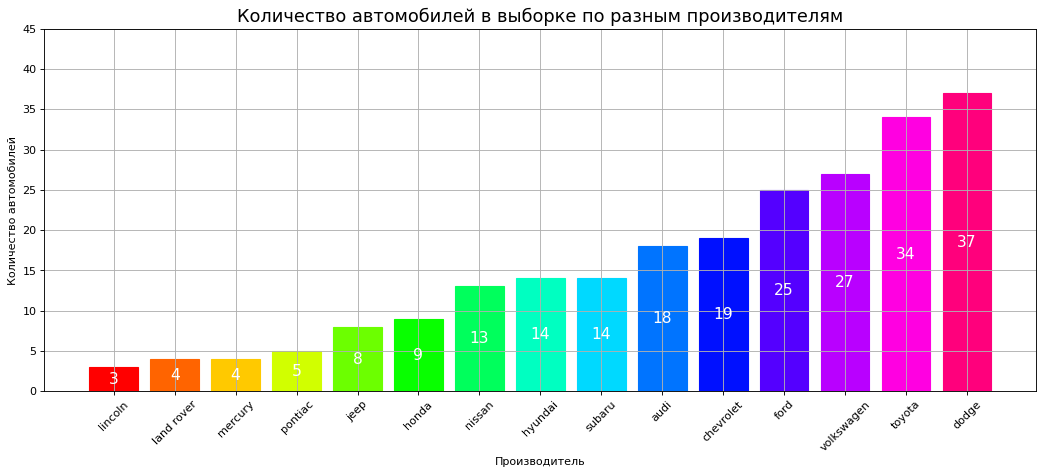

In [7]:
df_raw = pd.read_csv("../datasets/project12_auto.csv")
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
df_sorted = df.sort_values('counts').reset_index()
cmap = plt.get_cmap('hsv')
plt.figure(figsize=(16,6), dpi= 80)
bars = plt.bar(df_sorted['manufacturer'], df_sorted["counts"])

for i,bar in enumerate(bars):
    bar.set_color(cmap(i / len(bars)))

for i, val in enumerate(df_sorted['counts'].values):
    plt.text(i, val/2, int(val),
             ha='center',
             va='center', fontsize = 14, color='white')
    
plt.title("Количество автомобилей в выборке по разным производителям", fontsize=16)
plt.ylabel('Количество автомобилей')
plt.xlabel('Производитель')
plt.xticks(rotation = 45)
plt.ylim(0, 45)
plt.grid()
plt.show()

# Дополнительное задание

Выбери фильмы и сериалы какого-нибудь из жанров в датасете netflix_titles.csv и построй облако тегов на основе их описаний.

Для этого задания дополнительно понадобится установить библиотеки wordcloud и stop_words.

In [8]:
from wordcloud import WordCloud
from stop_words import get_stop_words
data = pd.read_csv('../datasets/netflix_titles.csv')

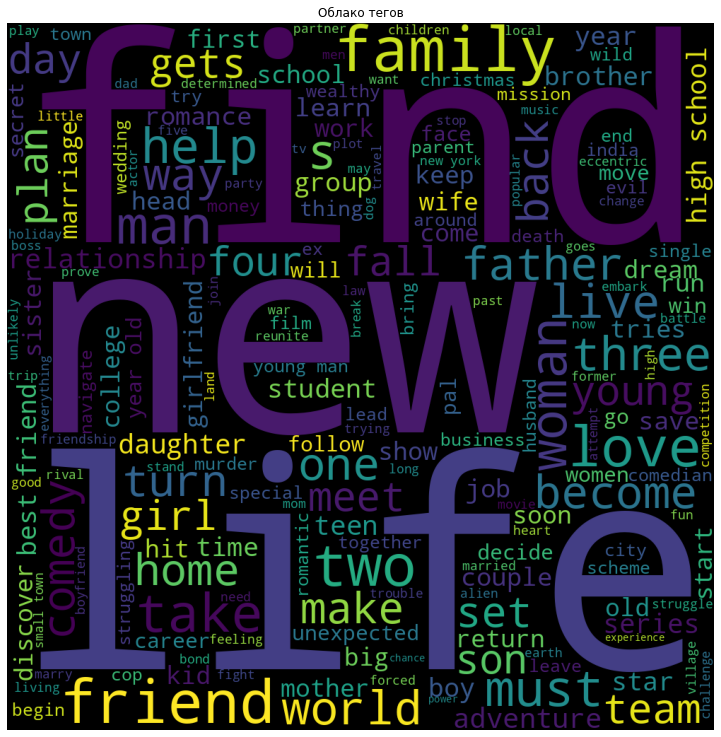

In [32]:
comedy = data[data['listed_in'].str.contains('Comedies')]
stop_words = get_stop_words('english')

description = ' '.join(comedy['description'])
description = description.lower()

def color_func(*args, **kwargs):
    return "rgb(0, {}, 0)".format(kwargs["font_size"] * 10)
wordcloud = WordCloud(width=1000, height=1000, random_state=21).generate(description)

plt.figure(figsize=(15,13))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Облако тегов')
plt.show()